In this notebook, we will discover the support vector machine algorithm as well as it implementation in scikit-learn. We will also discover the Principal Component Analysis and its implementation with scikit-learn.

# 1. Support Vector Machine — (SVM)

Support vector machine is another simple algorithm that every machine learning expert should have in his/her arsenal. Support vector machine is highly preferred by many as it produces significant accuracy with less computation power. Support Vector Machine, abbreviated as SVM can be used for both regression and classification tasks. But, it is widely used in classification objectives.

## 1. 1. What is Support Vector Machine?
The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.

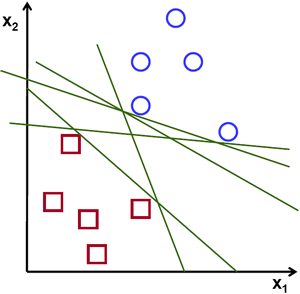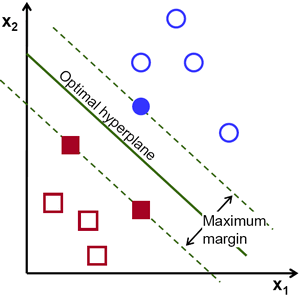

To separate the two classes of data points, there are many possible hyperplanes that could be chosen. Our objective is to find a plane that has the maximum margin, i.e the maximum distance between data points of both classes. Maximizing the margin distance provides some reinforcement so that future data points can be classified with more confidence.

## 1. 2. Hyperplanes and Support Vectors

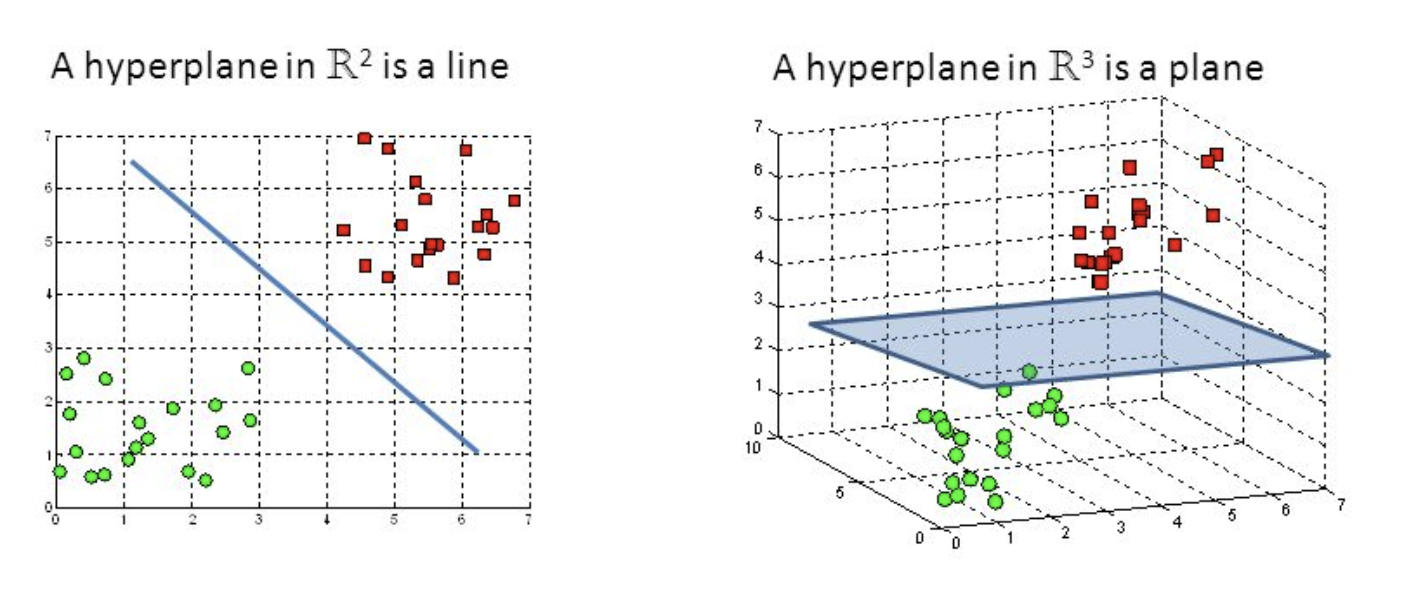
Hyperplanes are decision boundaries that help classify the data points. Data points falling on either side of the hyperplane can be attributed to different classes. Also, the dimension of the hyperplane depends upon the number of features. If the number of input features is 2, then the hyperplane is just a line. If the number of input features is 3, then the hyperplane becomes a two-dimensional plane. It becomes difficult to imagine when the number of features exceeds 3.

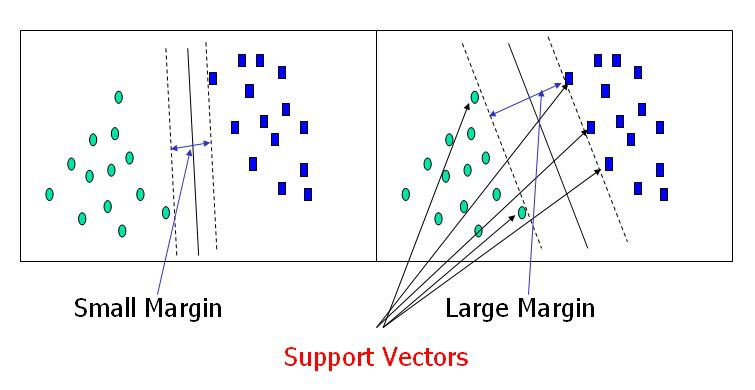

Support vectors are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. Using these support vectors, we maximize the margin of the classifier. Deleting the support vectors will change the position of the hyperplane. These are the points that help us build our SVM.

## 1. 3. Large Margin Intuition
In logistic regression, we take the output of the linear function and squash the value within the range of [0,1] using the sigmoid function. If the squashed value is greater than a threshold value(0.5) we assign it a label 1, else we assign it a label 0. In SVM, we take the output of the linear function and if that output is greater than 1, we identify it with one class and if the output is -1, we identify is with another class. Since the threshold values are changed to 1 and -1 in SVM, we obtain this reinforcement range of values([-1,1]) which acts as margin.

# 2. SVM Implementation in Python

We will use support vector machine in Predicting if the cancer diagnosis is benign or malignant based on several observations/features.

- 30 features are used, examples:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

- Datasets are linearly separable using all 30 input features
- Number of Instances: 569
- Class Distribution: 212 Malignant, 357 Benign
- Target class:
         - Malignant
         - Benign

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')

In [3]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

col_names = list(cancer.feature_names)
col_names.append('target')
df = pd.DataFrame(np.c_[cancer.data, cancer.target], columns=col_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [4]:
print(cancer.target_names)

['malignant' 'benign']


In [5]:
df.shape

(569, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

## 2. 1. VISUALIZING THE DATA

In [7]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

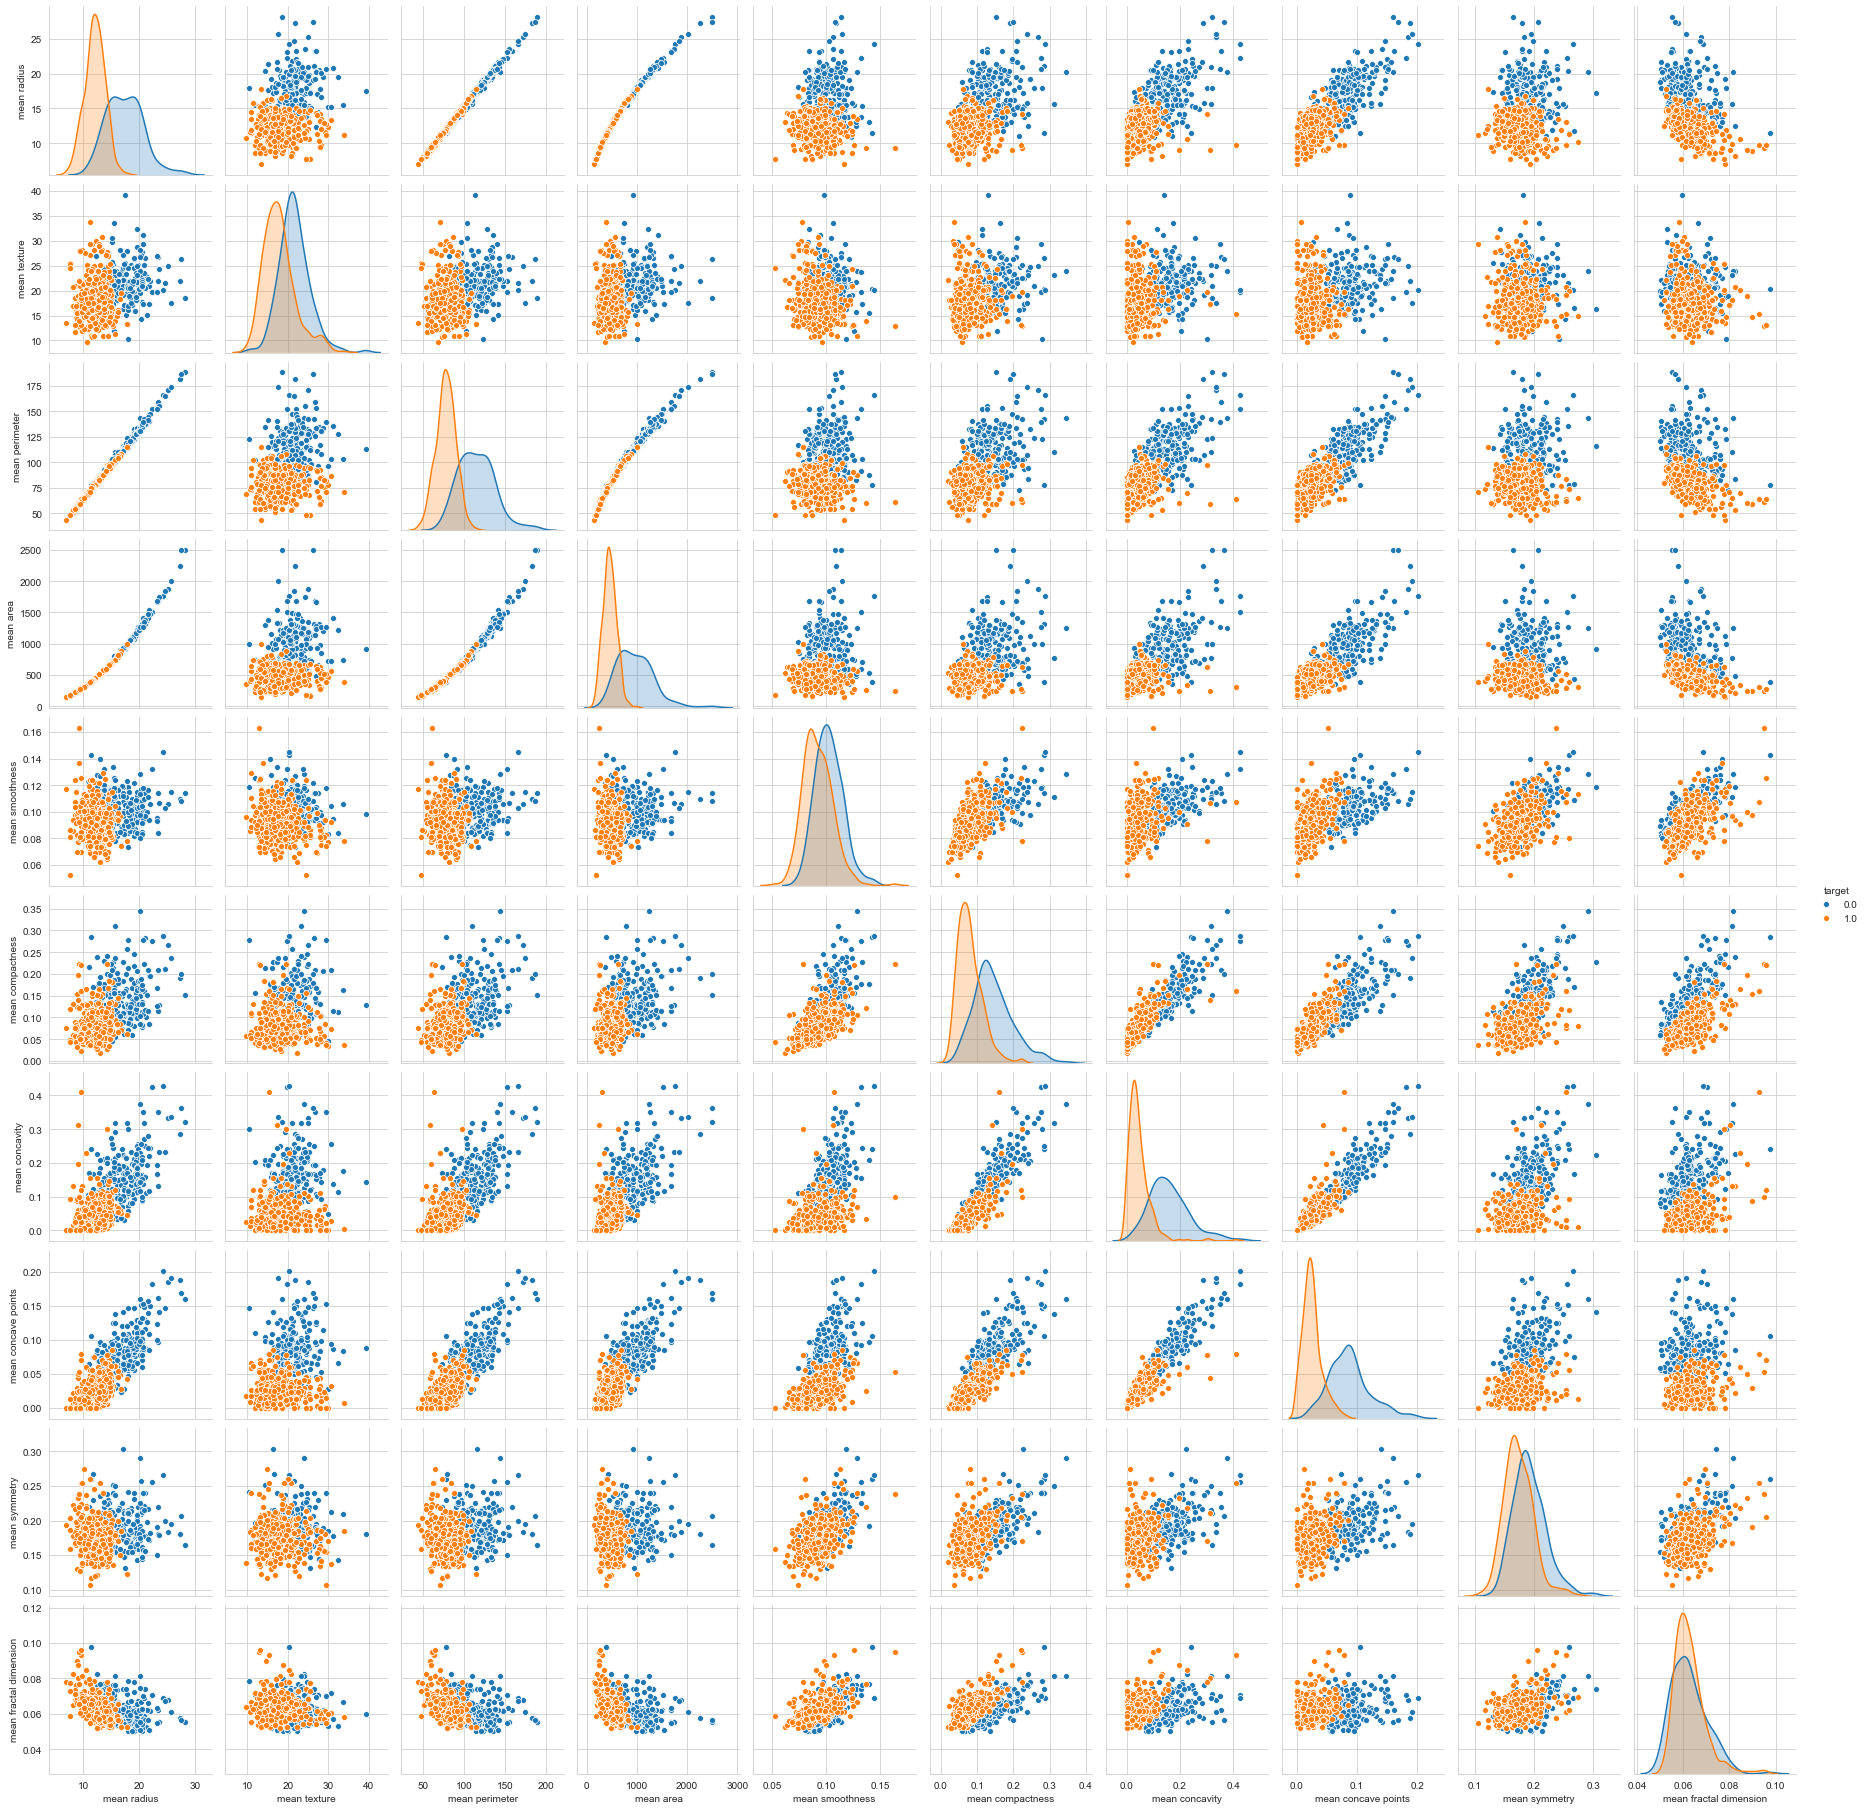

In [8]:
sns.pairplot(df, hue='target', vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area', 
                                     'mean smoothness', 'mean compactness', 'mean concavity',
                                     'mean concave points', 'mean symmetry', 'mean fractal dimension'])

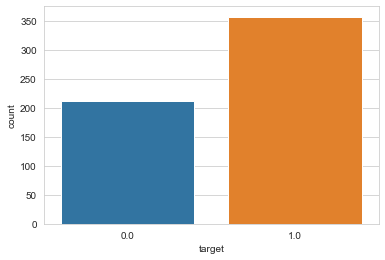

In [9]:
sns.countplot(df['target'], label = "Count")

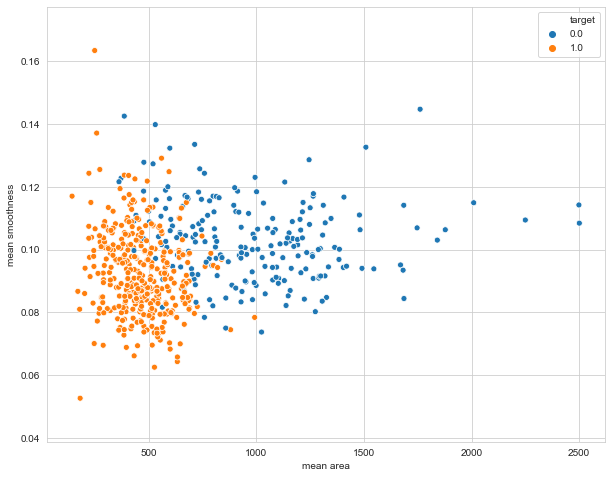

In [10]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x = 'mean area', y = 'mean smoothness', hue = 'target', data = df)

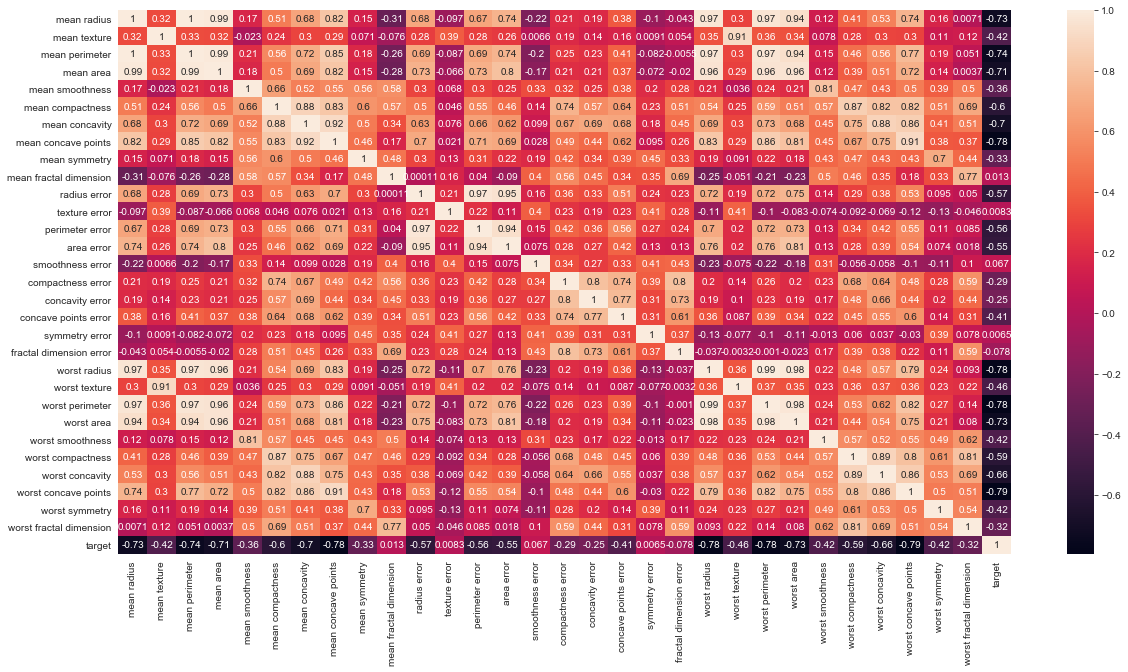

In [11]:
# Let's check the correlation between the variables 
# Strong correlation between the mean radius and mean perimeter, mean area and mean primeter
plt.figure(figsize=(20,10)) 
sns.heatmap(df.corr(), annot=True) 

## 2. 2. MODEL TRAINING (FINDING A PROBLEM SOLUTION)

In [12]:
X = df.drop('target', axis=1)
y = df.target

In [13]:
print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n===========================================")
        print(f"accuracy score: {accuracy_score(y_train, pred):.4f}\n")
        print(f"Classification Report: \n \tPrecision: {precision_score(y_train, pred)}\n\tRecall Score: {recall_score(y_train, pred)}\n\tF1 score: {f1_score(y_train, pred)}\n")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, clf.predict(X_train))}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n===========================================")        
        print(f"accuracy score: {accuracy_score(y_test, pred)}\n")
        print(f"Classification Report: \n \tPrecision: {precision_score(y_test, pred)}\n\tRecall Score: {recall_score(y_test, pred)}\n\tF1 score: {f1_score(y_test, pred)}\n")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")      

In [15]:
from sklearn.model_selection import cross_val_score, train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

## 2. 3. Support Vector Machines (Kernels)

- `C parameter`: Controlls trade-off between classifying training points correctly and having a smooth decision boundary.
    - Small C (loose) makes cost (penalty) of misclassification low (soft margin)
    - Large C (strict) makes cost of misclassification high (hard margin), forcing the model to explain input data stricter and potentially over it.
- `gamma parameter`: Controlls how far the influence of a single training set reaches.
    - Large gamma: close reach (closer data points have high weight)
    - Small gamma: far reach (more generalized solution)
- `degree parameter` : Degree of the polynomial kernel function (`'poly'`). Ignored by all other kernels.
****
### 2. 3. 1. Linear Kernel SVM

In [16]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
accuracy score: 0.9598

Classification Report: 
 	Precision: 0.9565217391304348
	Recall Score: 0.979757085020243
	F1 score: 0.9680000000000001

Confusion Matrix: 
 [[140  11]
 [  5 242]]

Test Result:
accuracy score: 0.9824561403508771

Classification Report: 
 	Precision: 0.9908256880733946
	Recall Score: 0.9818181818181818
	F1 score: 0.9863013698630138

Confusion Matrix: 
 [[ 60   1]
 [  2 108]]



### 2. 3. 2. Polynomial Kernel SVM

In [17]:
from sklearn.svm import SVC

model = SVC(kernel='poly', degree=2, gamma='auto')
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
accuracy score: 0.9874

Classification Report: 
 	Precision: 0.9879032258064516
	Recall Score: 0.9919028340080972
	F1 score: 0.98989898989899

Confusion Matrix: 
 [[148   3]
 [  2 245]]

Test Result:
accuracy score: 0.9707602339181286

Classification Report: 
 	Precision: 0.9565217391304348
	Recall Score: 1.0
	F1 score: 0.9777777777777777

Confusion Matrix: 
 [[ 56   5]
 [  0 110]]



### 2. 3. 3. Radial Kernel SVM

In [18]:
from sklearn.svm import SVC

model = SVC(kernel='rbf', gamma=1)
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
accuracy score: 1.0000

Classification Report: 
 	Precision: 1.0
	Recall Score: 1.0
	F1 score: 1.0

Confusion Matrix: 
 [[151   0]
 [  0 247]]

Test Result:
accuracy score: 0.6432748538011696

Classification Report: 
 	Precision: 0.6432748538011696
	Recall Score: 1.0
	F1 score: 0.7829181494661921

Confusion Matrix: 
 [[  0  61]
 [  0 110]]



## 2. 4. Data Preparation for SVM
This section lists some suggestions for how to best prepare your training data when learning an SVM model.

- **Numerical Inputs:** SVM assumes that your inputs are numeric. If you have categorical inputs you may need to covert them to binary dummy variables (one variable for each category).
- **Binary Classification:** Basic SVM as described in this post is intended for binary (two-class) classification problems. Although, extensions have been developed for regression and multi-class classification.

In [19]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X_std = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=5)

In [20]:
print("=======================Linear Kernel SVM==========================")
model = SVC(kernel='linear')
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

print("=======================Polynomial Kernel SVM==========================")
from sklearn.svm import SVC

model = SVC(kernel='poly', degree=2, gamma='auto')
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

print("=======================Radial Kernel SVM==========================")
from sklearn.svm import SVC

model = SVC(kernel='rbf', gamma=1)
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

=======================Linear Kernel SVM==========================
Train Result:
accuracy score: 0.9774

Classification Report: 
 	Precision: 0.9722222222222222
	Recall Score: 0.9919028340080972
	F1 score: 0.9819639278557114

Confusion Matrix: 
 [[144   7]
 [  2 245]]

Test Result:
accuracy score: 0.9883040935672515

Classification Report: 
 	Precision: 0.9821428571428571
	Recall Score: 1.0
	F1 score: 0.9909909909909909

Confusion Matrix: 
 [[ 59   2]
 [  0 110]]

=======================Polynomial Kernel SVM==========================
Train Result:
accuracy score: 0.7814

Classification Report: 
 	Precision: 0.7395209580838323
	Recall Score: 1.0
	F1 score: 0.8502581755593803

Confusion Matrix: 
 [[ 64  87]
 [  0 247]]

Test Result:
accuracy score: 0.8538011695906432

Classification Report: 
 	Precision: 0.8148148148148148
	Recall Score: 1.0
	F1 score: 0.8979591836734693

Confusion Matrix: 
 [[ 36  25]
 [  0 110]]

=======================Radial Kernel SVM==========================
Train 

# 3. Support Vector Machine Hyperparameter tuning

In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 0.5, 1, 10, 100], 
              'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001], 
              'kernel': ['rbf', 'poly', 'linear']} 

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5, iid=True)

grid.fit(X_train, y_train)

print_score(grid, X_train, y_train, X_test, y_test, train=True)
print_score(grid, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 126 candidates, totalling 630 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Train Result:
accuracy score: 0.9824

Classification Report: 
 	Precision: 0.9761904761904762
	Recall Score: 0.9959514170040485
	F1 score: 0.9859719438877755

Confusion Matrix: 
 [[145   6]
 [  1 246]]

Test Result:
accuracy score: 0.9883040935672515

Classification Report: 
 	Precision: 0.9821428571428571
	Recall Score: 1.0
	F1 score: 0.9909909909909909

Confusion Matrix: 
 [[ 59   2]
 [  0 110]]



[Parallel(n_jobs=1)]: Done 630 out of 630 | elapsed:    2.9s finished
C:\Users\fares\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


# 4. Principal Component Analysis

PCA is:
* Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.
* Unsupervised Machine Learning
* A transformation of your data and attempts to find out what features explain the most variance in your data. For example:

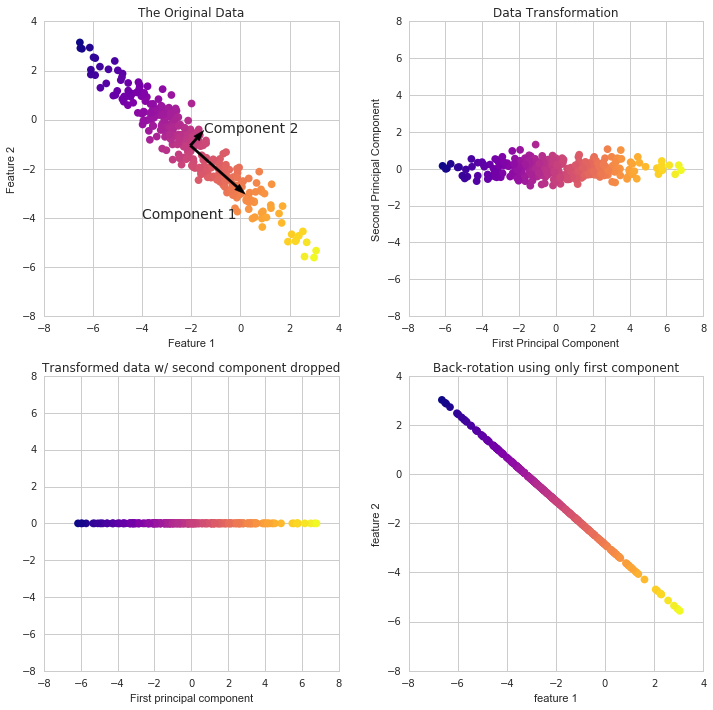

In [22]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


## 4. 1. PCA Visualization

As we've noticed before it is difficult to visualize high dimensional data, we can use PCA to find the first two principal components, and visualize the data in this new, two-dimensional space, with a single scatter-plot. Before we do this though, we'll need to scale our data so that each feature has a single unit variance.

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df.drop('target', axis=1))
scaled_data = scaler.transform(df.drop('target', axis=1))

In [24]:
pd.DataFrame(scaled_data)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


PCA with Scikit Learn uses a very similar process to other preprocessing functions that come with SciKit Learn. We instantiate a PCA object, find the principal components using the fit method, then apply the rotation and dimensionality reduction by calling transform().

We can also specify how many components we want to keep when creating the PCA object.

In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

In [26]:
pd.DataFrame(x_pca)

,0,1,2
0,9.192837,1.948583,-1.123165
1,2.387802,-3.768172,-0.529290
2,5.733896,-1.075174,-0.551747
3,7.122953,10.275589,-3.232785
4,3.935302,-1.948072,1.389767
...,...,...,...
564,6.439315,-3.576817,2.459487
565,3.793382,-3.584048,2.088477
566,1.256179,-1.902297,0.562730
567,10.374794,1.672010,-1.877032


Text(0, 0.5, 'Second Principal Component')

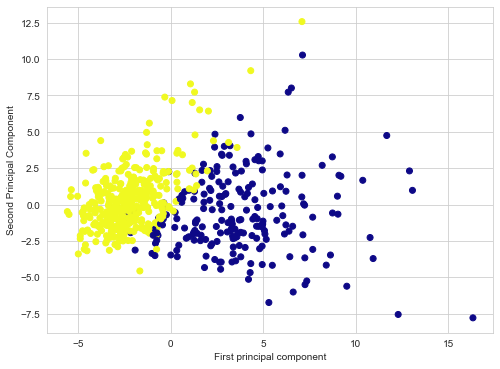

In [27]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df['target'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Clearly by using these two components we can easily separate these two classes.

## 4. 2. Interpreting the components 

Unfortunately, with this great power of dimensionality reduction, comes the cost of being able to easily understand what these components represent.

The components correspond to combinations of the original features, the components themselves are stored as an attribute of the fitted PCA object:

**Note:**

Principal Component Analysis:
* Used in exploratory data analysis (EDA) 
* Visualize genetic distance and relatedness between populations. 

* Method:
  * Eigenvalue decomposition of a data covariance (or correlation) matrix
  * Singular value decomposition of a data matrix (After mean centering / normalizing ) the data matrix for each attribute.

* Output
  * Component scores, sometimes called **factor scores** (the transformed variable values)
  * **loadings** (the weight)

* Data compression and information preservation 
* Visualization
* Noise filtering
* Feature extraction and engineering

In [28]:
X = x_pca
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

param_grid = {'C': [0.01, 0.1, 0.5, 1, 10, 100], 
              'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001], 
              'kernel': ['rbf', 'poly', 'linear']} 

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5, iid=True)

grid.fit(X_train, y_train)

print_score(grid, X_train, y_train, X_test, y_test, train=True)
print_score(grid, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 126 candidates, totalling 630 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Train Result:
accuracy score: 0.9598

Classification Report: 
 	Precision: 0.9565217391304348
	Recall Score: 0.979757085020243
	F1 score: 0.9680000000000001

Confusion Matrix: 
 [[140  11]
 [  5 242]]

Test Result:
accuracy score: 0.9766081871345029

Classification Report: 
 	Precision: 0.9649122807017544
	Recall Score: 1.0
	F1 score: 0.9821428571428572

Confusion Matrix: 
 [[ 57   4]
 [  0 110]]



[Parallel(n_jobs=1)]: Done 630 out of 630 | elapsed:   36.9s finished
C:\Users\fares\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


# 5. Summary

In this notebook you discovered the Support Vector Machine Algorithm for machine learning.  You learned about:
- What is support vector machine?.
- Support vector machine implementation in Python.
- Support Vector Machine kernels (Linear, Polynomial, Radial).
- How to prepare the data for support vector machine algorithm.
- Support vector machine hyperparameter tuning.
- Principal Compenent Analysis and how to use it to reduce the complexity of a problem.
- How to calculate the Principal Component Analysis for reuse on more data in scikit-learn.

## References:
- [Support Vector Machine — Introduction to Machine Learning Algorithms](https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47)
- [Support Vector Machines for Machine Learning](https://machinelearningmastery.com/support-vector-machines-for-machine-learning/)
- [Support Vector Machines documentations](https://scikit-learn.org/stable/modules/svm.html#svm-kernels)
- [scikit-learn Doc](http://scikit-learn.org/stable/modules/decomposition.html#pca)
- [scikit-learn Parameters](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA)
- [How to Calculate Principal Component Analysis (PCA) from Scratch in Python](https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/)